# Modeling: 

## Gradient Boosting Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Gradient Boosting Regression](#7_Gradient_Boosting_Regression)
    * [7.1 Fitting Gradient Boosting Regression](#7.1_Fitting_Gradient_Boosting_Regression)
    * [7.2 Gradient Boosting Regression: Residuals Visualization](#7.2_Gradient_Boosting_Regression:_Residuals_Visualization)
    * [7.3 Gradient Boosting Regression Model Evaluation](#7.3_Gradient_Boosting_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping high important Features Only](#7.4.2_Keeping_high_important_Features_Only)
       * [7.4.3 Features Selection Summary](#7.4.3_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: RandomizedSearchCV](#7.5_Hyperparameters_Tuning:_RandomizedSearchCV)
       * [7.5.1 RandomizedSearchCV for all features](#7.5.1_RandomizedSearchCV_for_all_features)
       * [7.5.2 Fitting Gradient Boosting Regression after RandomizedSearchCV (All features)](#7.5.2_Fitting_Gradient_Boosting_Regression_after_RandomizedSearchCV_(All_features))
       * [7.5.3 RandomizedSearchCV for high important Features Only](#7.5.3_RandomizedSearchCV_for_high_important_features_only)
       * [7.5.4 Fitting Gradient  Boosting Regression after RandomizedSearchCV (high important features)](#7.5.4_Fitting_Gradient_Boosting_Regression_after_RandomizedSearchCV_(high_important_features))
 * [8. Gradient Boosting Regression Tuning Summary](#8_Gradient_Boosting_Regression_Tuning_Summary)
 * [9. Gradient Boosting Regression Actual vs Prediction Visualization](#9_Gradient_Boosting_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using Gradient Boosting**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


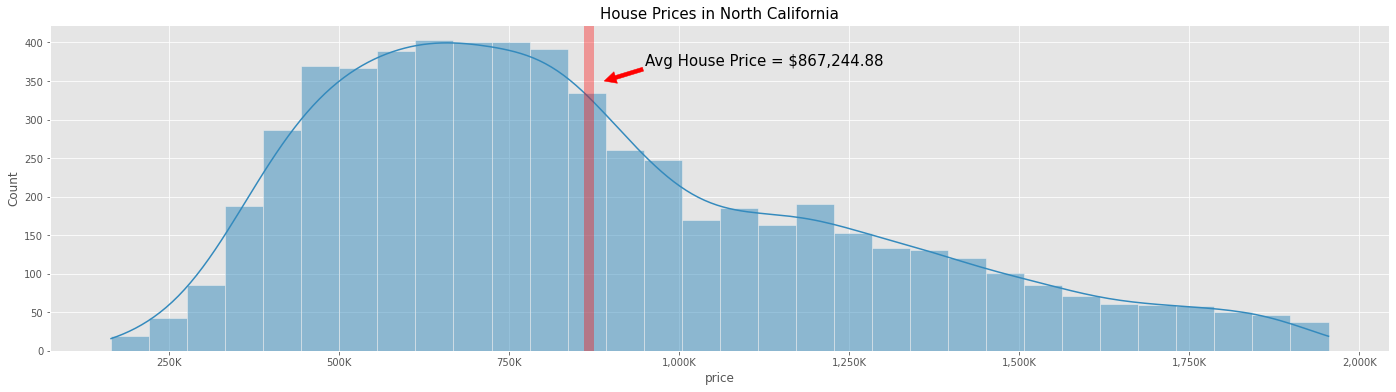

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [70]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']


# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Gradient Boosting Regression<a id='7_Gradient_Boosting_Regression'></a>

**Gradient Boosting** is an ensemble technique that takes an iterative approach to combining weak learners to create a strong learner by focusing on mistakes of prior iterations.

**Trade-Offs of Gradient Boosting:**
  * **Pros**:
    * Extremely powerful on both classification and regression tasks.
    * More accurate predictions compared to random forests.
    * Accepts various types of inputs
    * Outputs feature importance
  * **Cons**:
    * Longer to train (Cannot parallelize).
    * May overfit if too many trees are used (n_estimators)
    * More difficult to properly tune (Requires careful tuning of hyperparameters)
    * Sensitive to outliers


### 7.1 Fitting  Gradient Boosting Regression<a id='7.1_Fitting_Gradient_Boosting_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor: gbr
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
gbr = GradientBoostingRegressor(random_state=1981) 

# Fit the regressor to the training data
gbr.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(gbr.score(X_test, y_test) * 100), '%')

R^2 coefficient : 91.1470 %


Base Gradient Boosting Regression R-Squared coefficient is 99.1028% which is clearly lower than Random Forests Regression 99.6786 %.

In [18]:
# Predict on the test data: y_pred_gbr
y_pred_gbr = gbr.predict(X_test)

### 7.2 Gradient Boosting Regression: Residuals Visualization<a id='7.2_Gradient_Boosting_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

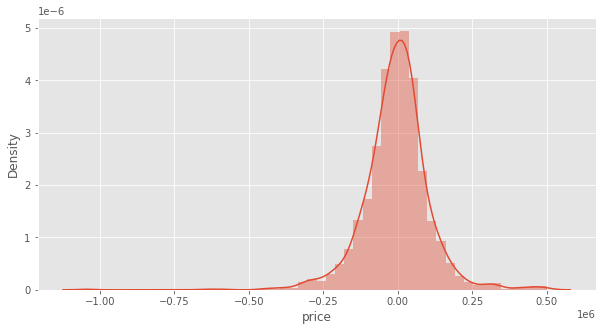

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_gbr)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 Gradient Boosting Regression Model Evaluation<a id='7.3_Gradient_Boosting_Regression_Model_Evaluation'></a>

In [20]:
from sklearn import metrics

print("********Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr) * 100), '%')
print("-------------------------------------------------")

********Gradient Boosting Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.1470 %
-------------------------------------------------------------
Adjusted R^2 Score: 90.9847 %
-------------------------------------------------
MAE: 77082.4736
-------------------------------------------------
RMSE:111965.8849
-------------------------------------------------
Variance Score:91.1607 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 111,965.8849**, which is slightly higher than 12% of the mean value of the Sales Price i.e.  $867,244.88. 


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


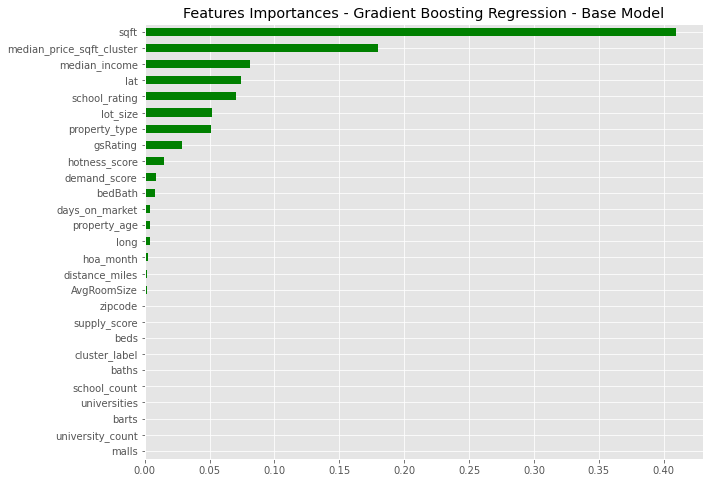

In [21]:
# First, let's create a pd.Series of features importances
importances_gbr = pd.Series(data=gbr.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_gbr.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Gradient Boosting Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.4.2 Keeping high important Features Only<a id='7.4.2_Keeping_high_important_Features_Only'></a> 

In [65]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type', 'zipcode', 'beds', 'sqft', 'lot_size',
       'days_on_market', 'lat', 'long', 'property_age', 'school_rating',
       'school_count', 'median_income', 'hotness_score', 'demand_score',
       'university_count', 'barts', 'AvgRoomSize', 'median_price_sqft_cluster',
       'gsRating', 'distance_miles']
# And, Now let's define X and y:
X = df[features]
y = df.price

In [66]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [67]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [68]:
# Create a GradientBoostingRegressor: gbr_2
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
gbr_2 = GradientBoostingRegressor(random_state=1981) 

# Fit the regressor to the training data
gbr_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(gbr_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_gbr_2
y_pred_gbr_2 = gbr_2.predict(X_test)

R^2 coefficient : 91.2097 %


In [49]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_2) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbr_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_2) * 100), '%')
print("-------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 90.8521 %
-------------------------------------------------------------
Adjusted R^2 Score: 90.7535 %
-------------------------------------------------
MAE: 78212.3780
-------------------------------------------------
RMSE:113814.8578
-------------------------------------------------
Variance Score:90.8621 %
-------------------------------------------------


#### 7.4.3 Features Selection Summary<a id='7.4.3_Features_Selection_Summary'></a>

As we can see below, when we're keeping the high important features: we're seeing a drop in the performance:

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.1470 %|90.9847 %|77082.4736|111965.8849|91.1607 %|
|Keeping high important Features    |90.8521 %|90.7535 %|78212.3780|113814.8578|90.8621 %|

### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [93]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [52]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = range(100, 1000, 100) # Default: 100
max_depth = range(3, 12) # Default: 3
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5] # Default: 0.1
max_features = ['auto', 'sqrt', 'log2', None] #default=None



params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'n_estimators': n_estimators,
           'max_features': max_features}]

# Create a GradientBoostingRegressor: gbr_search_1
gbr_search_1 = GradientBoostingRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: gbr_cv_all
gbr_cv_all = RandomizedSearchCV(estimator = gbr_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
gbr_cv_all.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END learning_rate=0.01, max_depth=8, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=8, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=11, max_features=sqrt, n_estimators=600; total time=   3.6s
[CV] END learning_rate=0.3, max_depth=11, max_features=sqrt, n_estimators=600; total time=   3.6s
[CV] END learning_rate=0.3, max_depth=11, max_features=sqrt, n_estimators=600; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=900; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=900; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=sqrt, n_estimators=900; total time=   3.1s
[CV] END learning_rate=0.07, max_depth=4, max_features=

[CV] END learning_rate=0.05, max_depth=11, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=11, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=11, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.07, max_depth=10, max_features=auto, n_estimators=400; total time=  19.2s
[CV] END learning_rate=0.07, max_depth=10, max_features=auto, n_estimators=400; total time=  18.2s
[CV] END learning_rate=0.07, max_depth=10, max_features=auto, n_estimators=400; total time=  17.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, n_estimators=900; total time=   8.6s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, n_estimators=900; total time=   9.8s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, n_estimators=900; total time=   7.4s
[CV] END learning_rate=0.5, max_depth=5, max_features=log2, n_estimators=400; total time=   1.9s
[CV] END learning_

[CV] END learning_rate=0.07, max_depth=9, max_features=auto, n_estimators=700; total time=  25.2s
[CV] END learning_rate=0.07, max_depth=9, max_features=auto, n_estimators=700; total time=  23.5s
[CV] END learning_rate=0.07, max_depth=9, max_features=auto, n_estimators=700; total time=  32.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, n_estimators=900; total time=  19.6s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, n_estimators=900; total time=  19.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, n_estimators=900; total time=  22.2s
[CV] END learning_rate=0.3, max_depth=3, max_features=None, n_estimators=400; total time=   4.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=None, n_estimators=400; total time=   5.4s
[CV] END learning_rate=0.3, max_depth=3, max_features=None, n_estimators=400; total time=   4.9s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, n_estimators=700; total time=   4.6s
[CV] END learning_rate=

[CV] END learning_rate=0.5, max_depth=10, max_features=auto, n_estimators=500; total time=  24.6s
[CV] END learning_rate=0.5, max_depth=10, max_features=auto, n_estimators=500; total time=  23.5s
[CV] END learning_rate=0.5, max_depth=10, max_features=auto, n_estimators=500; total time=  24.0s
[CV] END learning_rate=0.07, max_depth=5, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.07, max_depth=5, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.07, max_depth=5, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, n_estimators=400; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=10, max_features=sqrt, n_estimators=600; total time=   8.3s
[CV] END learning_ra

[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=900; total time=  17.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=900; total time=  15.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, n_estimators=900; total time=  16.3s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=200; total time=   7.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=200; total time=   7.7s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=200; total time=   7.5s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=900; total time=  32.3s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=900; total time=  31.0s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=900; total time=  32.0s
[CV] END learning_rate=0.07, max_depth=5, max_features=auto, n_estimators=700; total time=  16.9s
[CV] END learning_rate=0.0

[CV] END learning_rate=0.5, max_depth=5, max_features=None, n_estimators=200; total time=   4.0s
[CV] END learning_rate=0.5, max_depth=5, max_features=None, n_estimators=200; total time=   3.2s
[CV] END learning_rate=0.5, max_depth=5, max_features=None, n_estimators=200; total time=   4.1s
[CV] END learning_rate=0.3, max_depth=10, max_features=log2, n_estimators=800; total time=   6.8s
[CV] END learning_rate=0.3, max_depth=10, max_features=log2, n_estimators=800; total time=   5.4s
[CV] END learning_rate=0.3, max_depth=10, max_features=log2, n_estimators=800; total time=   5.7s
[CV] END learning_rate=0.05, max_depth=7, max_features=None, n_estimators=900; total time=  22.7s
[CV] END learning_rate=0.05, max_depth=7, max_features=None, n_estimators=900; total time=  23.9s
[CV] END learning_rate=0.05, max_depth=7, max_features=None, n_estimators=900; total time=  30.5s
[CV] END learning_rate=0.5, max_depth=11, max_features=auto, n_estimators=900; total time=  15.1s
[CV] END learning_rate=

[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=600; total time=  23.8s
[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=600; total time=  24.8s
[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=600; total time=  24.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=700; total time=  10.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=700; total time=  10.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, n_estimators=700; total time=  11.3s
[CV] END learning_rate=0.5, max_depth=9, max_features=auto, n_estimators=300; total time=  13.0s
[CV] END learning_rate=0.5, max_depth=9, max_features=auto, n_estimators=300; total time=  14.2s
[CV] END learning_rate=0.5, max_depth=9, max_features=auto, n_estimators=300; total time=  16.8s
[CV] END learning_rate=0.5, max_depth=6, max_features=None, n_estimators=800; total time=  22.0s
[CV] END learning_rate=0.5, ma

[CV] END learning_rate=0.05, max_depth=10, max_features=log2, n_estimators=900; total time=   5.8s
[CV] END learning_rate=0.05, max_depth=10, max_features=log2, n_estimators=900; total time=   8.3s
[CV] END learning_rate=0.05, max_depth=10, max_features=log2, n_estimators=900; total time=   8.5s
[CV] END learning_rate=0.3, max_depth=8, max_features=auto, n_estimators=500; total time=  16.0s
[CV] END learning_rate=0.3, max_depth=8, max_features=auto, n_estimators=500; total time=  18.8s
[CV] END learning_rate=0.3, max_depth=8, max_features=auto, n_estimators=500; total time=  20.4s
[CV] END learning_rate=0.5, max_depth=11, max_features=auto, n_estimators=200; total time=  10.3s
[CV] END learning_rate=0.5, max_depth=11, max_features=auto, n_estimators=200; total time=   9.9s
[CV] END learning_rate=0.5, max_depth=11, max_features=auto, n_estimators=200; total time=   8.3s
[CV] END learning_rate=0.5, max_depth=10, max_features=None, n_estimators=400; total time=  14.6s
[CV] END learning_ra

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1981),
                   n_iter=200, n_jobs=1,
                   param_distributions=[{'learning_rate': [0.01, 0.05, 0.07,
                                                           0.1, 0.3, 0.5],
                                         'max_depth': range(3, 12),
                                         'max_features': ['auto', 'sqrt',
                                                          'log2', None],
                                         'n_estimators': range(100, 1000, 100)}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
#checking the value of optimum number of parameters
print("Tuned Gradient Boosting Regression Parameters: {}".format(gbr_cv_all.best_params_))
print("Tuned Gradient Boosting - Best neg_mean_squared_error Score is {:.4f}".format(gbr_cv_all.best_score_ * 100), "%")

Tuned Gradient Boosting Regression Parameters: {'n_estimators': 900, 'max_features': 'sqrt', 'max_depth': 8, 'learning_rate': 0.01}
Tuned Gradient Boosting - Best neg_mean_squared_error Score is -1175698899700.1289 %


In [58]:
cv_results = pd.DataFrame(gbr_cv_all.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,200.0,9.680000e+00,9.300000e+00,3.000000e-01,2.310000e+00,5.690000e+00,1.538000e+01,4.343000e+01
std_fit_time,200.0,6.800000e-01,8.200000e-01,0.000000e+00,1.400000e-01,3.600000e-01,9.200000e-01,3.770000e+00
mean_score_time,200.0,5.000000e-02,3.000000e-02,0.000000e+00,2.000000e-02,4.000000e-02,6.000000e-02,1.500000e-01
std_score_time,200.0,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,3.000000e-02
split0_test_score,200.0,-1.416012e+10,3.120659e+09,-3.562395e+10,-1.519810e+10,-1.368304e+10,-1.227050e+10,-1.142760e+10
split1_test_score,200.0,-1.465817e+10,3.608739e+09,-3.994052e+10,-1.552809e+10,-1.404518e+10,-1.274446e+10,-1.151686e+10
split2_test_score,200.0,-1.477738e+10,3.356213e+09,-3.859576e+10,-1.598839e+10,-1.399364e+10,-1.289683e+10,-1.190634e+10
mean_test_score,200.0,-1.453189e+10,3.320343e+09,-3.805341e+10,-1.595922e+10,-1.395578e+10,-1.253414e+10,-1.175699e+10
std_test_score,200.0,5.112968e+08,3.554019e+08,1.186109e+08,2.620784e+08,4.149682e+08,6.033810e+08,1.803478e+09
rank_test_score,200.0,1.004800e+02,5.787000e+01,1.000000e+00,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02


#### 7.5.2 Fitting Gradient Boosting Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_Gradient_Boosting_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [95]:
#(Best RandomizedSearchCV)
n_estimators = 1500
max_depth = 8
learning_rate = 0.01
max_features = 'sqrt'


# Create a GradientBoostingRegressor: gbr_tuned_cv_1
gbr_tuned_cv_1 = GradientBoostingRegressor(max_depth = max_depth,
                                           n_estimators = n_estimators,
                                           learning_rate = learning_rate,
                                           max_features = max_features,
                                           random_state=1981)

# Fit the regressor to the training data
gbr_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(gbr_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbr_cv_1
y_pred_gbr_cv_1 = gbr_tuned_cv_1.predict(X_test)


R^2 coefficient Tuned_final : 92.4545 %


In [91]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_cv_1) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbr_cv_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_cv_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_cv_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_cv_1) * 100), '%')
print("-------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.4545 %
-------------------------------------------------
Adjusted R^2 Score: 92.3162 %
-------------------------------------------------
MAE: 66219.4133
-------------------------------------------------
RMSE:103367.2310
-------------------------------------------------
Variance Score:92.4616 %
-------------------------------------------------


#### 7.5.3 RandomizedSearchCV for high important Features Only<a id='7.5.3_RandomizedSearchCV_for_high_important_features_only'></a> 

In [96]:
# Let's define/select our features:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [97]:
n_estimators = range(800, 1800, 100) # Default: 100
max_depth = range(3, 12) # Default: 3
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5] # Default: 0.1
max_features = ['auto', 'sqrt', 'log2', None] #default=None



params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'n_estimators': n_estimators,
           'max_features': max_features}]

# Create a GradientBoostingRegressor: gbr_search_2
gbr_search_2 = GradientBoostingRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: gbr_cv_2
gbr_cv_2 = RandomizedSearchCV(estimator = gbr_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
gbr_cv_2.fit(X_train, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END learning_rate=0.05, max_depth=6, max_features=log2, n_estimators=1400; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=log2, n_estimators=1400; total time=   4.8s
[CV] END learning_rate=0.05, max_depth=6, max_features=log2, n_estimators=1400; total time=   4.2s
[CV] END learning_rate=0.5, max_depth=4, max_features=sqrt, n_estimators=1500; total time=   3.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=sqrt, n_estimators=1500; total time=   3.1s
[CV] END learning_rate=0.5, max_depth=4, max_features=sqrt, n_estimators=1500; total time=   3.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=None, n_estimators=900; total time=   6.5s
[CV] END learning_rate=0.3, max_depth=4, max_features=None, n_estimators=900; total time=   6.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=None, n_estimators=900; total time=   6.5s
[CV] END learning_rate=0.07, max_depth=5, max_features=

[CV] END learning_rate=0.07, max_depth=6, max_features=sqrt, n_estimators=1400; total time=   7.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=sqrt, n_estimators=1600; total time=   7.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=sqrt, n_estimators=1600; total time=   7.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=sqrt, n_estimators=1600; total time=   7.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, n_estimators=1100; total time=  29.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, n_estimators=1100; total time=  31.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=auto, n_estimators=1100; total time=  36.8s
[CV] END learning_rate=0.1, max_depth=5, max_features=None, n_estimators=900; total time=  12.2s
[CV] END learning_rate=0.1, max_depth=5, max_features=None, n_estimators=900; total time=  12.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=None, n_estimators=900; total time=  12.8s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=8, max_features=auto, n_estimators=1500; total time=  23.7s
[CV] END learning_rate=0.07, max_depth=3, max_features=None, n_estimators=900; total time=   5.7s
[CV] END learning_rate=0.07, max_depth=3, max_features=None, n_estimators=900; total time=   5.7s
[CV] END learning_rate=0.07, max_depth=3, max_features=None, n_estimators=900; total time=   5.6s
[CV] END learning_rate=0.5, max_depth=9, max_features=sqrt, n_estimators=1600; total time=   4.0s
[CV] END learning_rate=0.5, max_depth=9, max_features=sqrt, n_estimators=1600; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=9, max_features=sqrt, n_estimators=1600; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=7, max_features=auto, n_estimators=1600; total time=  22.3s
[CV] END learning_rate=0.01, max_depth=7, max_features=auto, n_estimators=1600; total time=  22.3s
[CV] END learning_rate=0.01, max_depth=7, max_features=auto, n_estimators=1600; total time=  21.6s
[CV] END learning

[CV] END learning_rate=0.05, max_depth=11, max_features=sqrt, n_estimators=1100; total time=  10.8s
[CV] END learning_rate=0.07, max_depth=6, max_features=auto, n_estimators=900; total time=  17.8s
[CV] END learning_rate=0.07, max_depth=6, max_features=auto, n_estimators=900; total time=  17.2s
[CV] END learning_rate=0.07, max_depth=6, max_features=auto, n_estimators=900; total time=  17.1s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1300; total time=  44.1s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1300; total time=  45.0s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1300; total time=  40.7s
[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=1200; total time=  19.6s
[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=1200; total time=  20.8s
[CV] END learning_rate=0.5, max_depth=8, max_features=auto, n_estimators=1200; total time=  20.7s
[CV] END learni

[CV] END learning_rate=0.05, max_depth=3, max_features=auto, n_estimators=1300; total time=  15.5s
[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1200; total time=   4.8s
[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1200; total time=   5.2s
[CV] END learning_rate=0.5, max_depth=10, max_features=log2, n_estimators=1200; total time=   5.6s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, n_estimators=1700; total time=   6.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, n_estimators=1700; total time=   6.8s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, n_estimators=1700; total time=   5.8s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, n_estimators=1100; total time=   7.2s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, n_estimators=1100; total time=   6.9s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, n_estimators=1100; total time=   8.3s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=5, max_features=sqrt, n_estimators=1200; total time=   5.7s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, n_estimators=1300; total time=   4.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, n_estimators=1300; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, n_estimators=1300; total time=   4.7s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1100; total time=  34.7s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1100; total time=  40.2s
[CV] END learning_rate=0.3, max_depth=11, max_features=auto, n_estimators=1100; total time=  38.9s
[CV] END learning_rate=0.07, max_depth=8, max_features=None, n_estimators=800; total time=  19.4s
[CV] END learning_rate=0.07, max_depth=8, max_features=None, n_estimators=800; total time=  17.5s
[CV] END learning_rate=0.07, max_depth=8, max_features=None, n_estimators=800; total time=  17.8s
[CV] END learning

[CV] END learning_rate=0.05, max_depth=7, max_features=None, n_estimators=1300; total time=  25.1s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, n_estimators=1300; total time=   9.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, n_estimators=1300; total time=   8.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=log2, n_estimators=1300; total time=   8.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, n_estimators=1600; total time=  23.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, n_estimators=1600; total time=  23.4s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, n_estimators=1600; total time=  22.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, n_estimators=1300; total time=   4.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, n_estimators=1300; total time=   3.5s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, n_estimators=1300; total time=   3.5s
[CV] END learnin

[CV] END learning_rate=0.5, max_depth=3, max_features=sqrt, n_estimators=1700; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=10, max_features=None, n_estimators=1200; total time=  27.7s
[CV] END learning_rate=0.1, max_depth=10, max_features=None, n_estimators=1200; total time=  27.6s
[CV] END learning_rate=0.1, max_depth=10, max_features=None, n_estimators=1200; total time=  27.0s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=1300; total time=  19.8s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=1300; total time=  20.1s
[CV] END learning_rate=0.5, max_depth=7, max_features=auto, n_estimators=1300; total time=28.5min
[CV] END learning_rate=0.1, max_depth=8, max_features=log2, n_estimators=1400; total time=   6.3s
[CV] END learning_rate=0.1, max_depth=8, max_features=log2, n_estimators=1400; total time=   6.1s
[CV] END learning_rate=0.1, max_depth=8, max_features=log2, n_estimators=1400; total time=   5.8s
[CV] END learning

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=1981),
                   n_iter=200, n_jobs=1,
                   param_distributions=[{'learning_rate': [0.01, 0.05, 0.07,
                                                           0.1, 0.3, 0.5],
                                         'max_depth': range(3, 12),
                                         'max_features': ['auto', 'sqrt',
                                                          'log2', None],
                                         'n_estimators': range(800, 1800, 100)}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
#checking the value of optimum number of parameters
print("Tuned Gradient Boosting Regression Parameters: {}".format(gbr_cv_2.best_params_))
print("Tuned Gradient Boosting - Best neg_mean_squared_error score is {:.4f}".format(gbr_cv_2.best_score_ * 100), "%")

Tuned Gradient Boosting Regression Parameters: {'n_estimators': 800, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.05}
Tuned Gradient Boosting - Best neg_mean_squared_error score is -1175156929067.8337 %


In [101]:
cv_results = pd.DataFrame(gbr_cv_2.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,200.0,2.031000e+01,4.567000e+01,2.130000e+00,6.580000e+00,1.291000e+01,2.299000e+01,5.835100e+02
std_fit_time,200.0,6.870000e+00,6.153000e+01,0.000000e+00,2.500000e-01,4.800000e-01,1.420000e+00,7.969400e+02
mean_score_time,200.0,9.000000e-02,5.000000e-02,2.000000e-02,5.000000e-02,8.000000e-02,1.100000e-01,2.900000e-01
std_score_time,200.0,1.000000e-02,2.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e-02,1.400000e-01
split0_test_score,200.0,-1.348471e+10,1.743415e+09,-1.784633e+10,-1.462184e+10,-1.277881e+10,-1.205057e+10,-1.136037e+10
split1_test_score,200.0,-1.374348e+10,1.629388e+09,-1.828034e+10,-1.482300e+10,-1.320786e+10,-1.255999e+10,-1.152730e+10
split2_test_score,200.0,-1.408953e+10,1.711919e+09,-1.894259e+10,-1.514971e+10,-1.354155e+10,-1.274966e+10,-1.185387e+10
mean_test_score,200.0,-1.377257e+10,1.648777e+09,-1.729307e+10,-1.464975e+10,-1.316897e+10,-1.239991e+10,-1.175157e+10
std_test_score,200.0,3.926278e+08,2.516439e+08,4.855140e+07,2.207966e+08,3.210803e+08,5.148060e+08,1.302737e+09
rank_test_score,200.0,1.003500e+02,5.778000e+01,1.000000e+00,5.050000e+01,1.005000e+02,1.502500e+02,2.000000e+02


#### 7.5.4 Fitting Gradient  Boosting Regression after RandomizedSearchCV (high important features)<a id='7.5.4_Fitting_Gradient_Boosting_Regression_after_RandomizedSearchCV_(high_important_features)'></a>

In [99]:
#(Best RandomizedSearchCV)
n_estimators = 800
max_depth = 6
learning_rate = 0.05
max_features = 'log2'


# Create a GradientBoostingRegressor: gbr_tuned_cv_2
gbr_tuned_cv_2 = GradientBoostingRegressor(max_depth = max_depth,
                                           n_estimators = n_estimators,
                                           learning_rate = learning_rate,
                                           max_features = max_features, random_state=1981)

# Fit the regressor to the training data
gbr_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(gbr_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbr_cv_2
y_pred_gbr_cv_2 = gbr_tuned_cv_2.predict(X_test)

R^2 coefficient Tuned_final : 92.4799 %


In [100]:
print("********Tuned Gradient Boosting Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr_cv_2) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbr_cv_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr_cv_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_cv_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr_cv_2) * 100), '%')
print("-------------------------------------------------")

********Tuned Gradient Boosting Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.4799 %
-------------------------------------------------
Adjusted R^2 Score: 92.3988 %
-------------------------------------------------
MAE: 66910.7055
-------------------------------------------------
RMSE:103193.3274
-------------------------------------------------
Variance Score:92.4863 %
-------------------------------------------------


## 8. Gradient Boosting Regression Tuning Summary<a id='8_Gradient_Boosting_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Gradient Boosting Regression Model by:
 * keeping only the most important features: and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'n_estimators': 1500, 'max_features': 'sqrt', 'max_depth': 8, 'learning_rate': 0.01} when considering all features.
   * {'n_estimators': 800, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.05}  when considering the high important features.
 * Variance Score has improved from 91.1607 % (Gradient Boosting - baseline) to 92.4863 %.
 
|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.1470 %|90.9847 %|77082.4736|111965.8849|91.1607 %|
|Baseline (Keeping high important Features)    |90.8521 %|90.7535 %|78212.3780|113814.8578|90.8621 %|
|All Features + RandomizedSearchCV {'n_estimators': 1500, 'max_features': 'sqrt', 'max_depth': 8, 'learning_rate': 0.01}|92.4545 %|92.3162 %|66219.4133|103367.2310|92.4616 %|
|High Important Features + RandomizedSearchCV {'n_estimators': 800, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.05}	   |92.4799 %|92.3988 %|66910.7055|103193.3274|92.4863 %|

**Learning rate Summary**:
 * The lower the learning rate, the slower the model learns. 
 * The advantage of slower learning rate is that the model becomes more robust and generalized (In statistical learning, models that learn slowly perform better).
 * Learning slowly comes at a cost. It takes more time to train the model which brings us to the other significant hyperparameter.
 
 
**n_estimator Summary**:
 * n_estimator is the number of trees used in the model. 
 * If the learning rate is low, we need more trees to train the model.
 * We need to be very careful at selecting the number of trees. It creates a high risk of overfitting to use too many trees.
 
**Random Forests vs Gradient Boosting**: 
 * One key difference between random forests and gradient boosting decision trees is the number of trees used in the model.
   * Increasing the number of trees in random forests does not cause overfitting.
   * The number of trees in gradient boosting decision trees is very critical in terms of overfitting. Adding too many trees will cause overfitting so it is important to stop adding trees at some point.
 

## 9. Gradient Boosting Regression Actual vs Prediction Visualization<a id='9_Gradient_Boosting_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

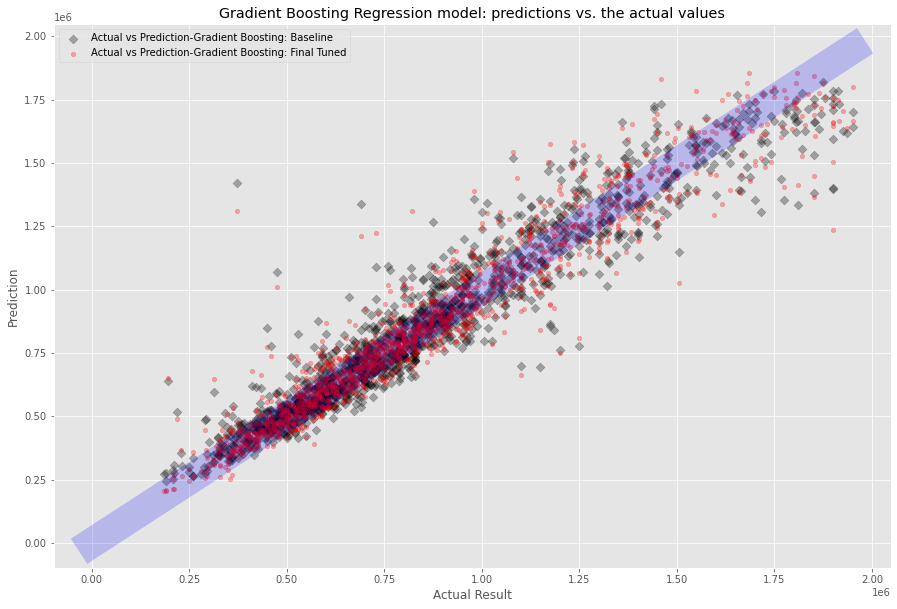

In [102]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_gbr, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Gradient Boosting: Baseline')
plt.scatter(y_test,y_pred_gbr_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Gradient Boosting: Final Tuned')
plt.title('Gradient Boosting Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [103]:
final_gbr = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_gbr.round(3), 'SalePrice_Predicted_Tuned': y_pred_gbr_cv_2.round(3)})
final_gbr.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
437,1767539,1438108.394,1603351.158
253,1600000,1564990.105,1650501.535
2625,1566000,1511760.283,1554122.207
2170,1485000,1437271.563,1441935.543
1913,1463000,1312890.312,1281556.770
3237,1370000,1392928.150,1411242.890
1804,1320000,1016351.672,1123951.836
4358,1170000,1025767.487,1066143.253
1343,1005000,796618.857,892626.086
406,990000,1102310.704,1084257.345


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 7th Model: Gradient Boosting, let's see if we can further improve our prediction using below algorithm:

 * XGBoost.
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))